In [96]:
options(repr.plot.width=6, repr.plot.height=4)

## Lista 10

### Ej 1

In [97]:
velo.data = read.table('datos/lista9_velocidad.txt')[,1]

#### Ej 1.1

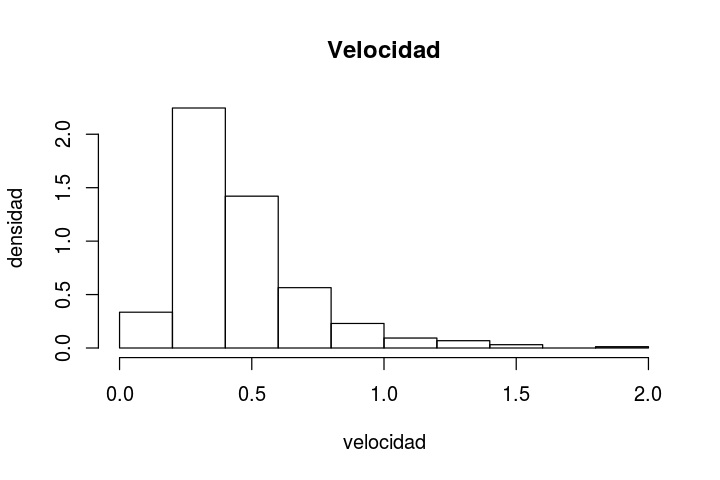

In [98]:
hist(velo.data, main='Velocidad', freq=F, ylab='densidad', xlab='velocidad')

#### Ej 1.2 y 1.3

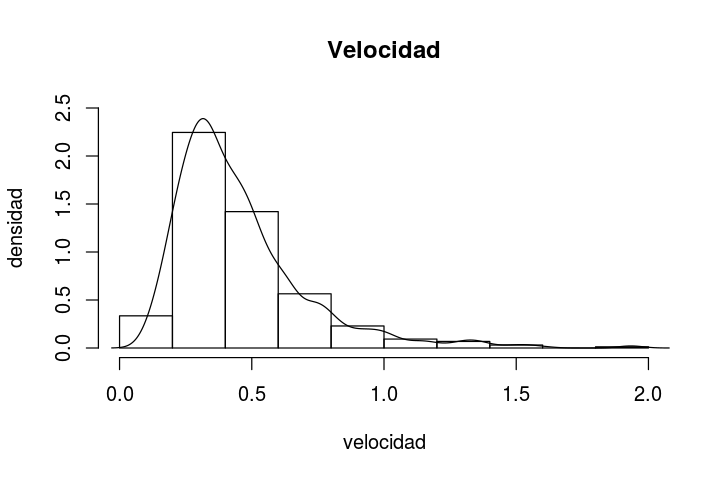

In [99]:
hist(velo.data, main='Velocidad', xlab='velocidad', ylab='densidad', freq=F, ylim=c(0, 2.5))
xs = seq(0, 2, length.out=200)
lines(d)

#### Ej 1.4

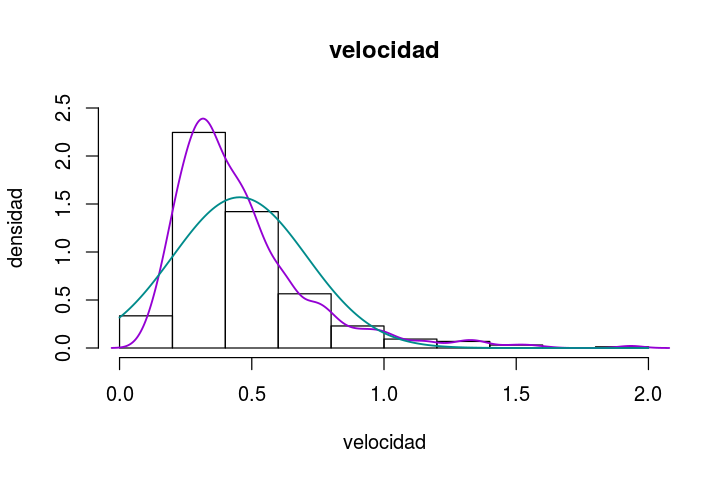

In [102]:
hist(velo.data, main='velocidad', xlab='velocidad', ylab='densidad', freq=F, ylim=c(0, 2.5))
lines(d, col='darkviolet', lw=1.5)
xs = seq(0, 2, length.out=200)
lines(xs, dnorm(xs, mean(velo.data), sd(velo.data)), col='darkcyan', lw=1.5)

#### Ej 1.5
El modelo $\mathcal{M}_2$ tiene 5 parámetros.

In [103]:
library('mixtools')

#### Ej 1.6

In [104]:
set.seed(2)
velo.em = mixtools::normalmixEM(velo.data)

number of iterations= 71 


In [105]:
sprintf('Loglik = %f', velo.em$loglik)

[1] "Loglik = 128.227047"

#### Ej 1.7

In [175]:
set.seed(9)
velo.em = mixtools::normalmixEM(velo.data)

number of iterations= 67 


In [176]:
sprintf('Loglik = %f', velo.em$loglik)

[1] "Loglik = 128.227047"

#### Ej 1.8

In [177]:
sprintf('La estimación es:')
sprintf('$\\alpha_1 = %f$', velo.em$lambda[1])
sprintf('$\\alpha_2 = %f$', velo.em$lambda[2])
sprintf('$\\mu_1 = %f$', velo.em$mu[1])
sprintf('$\\mu_2 = %f$', velo.em$mu[2])
sprintf('$\\sigma_1 = %f$', velo.em$sigma[1])
sprintf('$\\sigma_2 = %f$', velo.em$sigma[2])

[1] "La estimación es:"

[1] "$\\alpha_1 = 0.761816$"

[1] "$\\alpha_2 = 0.238184$"

[1] "$\\mu_1 = 0.360945$"

[1] "$\\mu_2 = 0.753400$"

[1] "$\\sigma_1 = 0.126115$"

[1] "$\\sigma_2 = 0.320140$"

#### Ej 1.9

In [178]:
mixem.density.gen = function(mixem) {
    res = function(xs) {
        all = lapply(1:length(mixem$lambda), function(idx) {mixem$lambda[idx] * dnorm(xs, mixem$mu[idx], mixem$sigma[idx])})
        ret = all[[1]]
        for (idx in 2:length(all)) {
            ret = ret + all[[idx]]
        }
        ret
    }
    res
}

mixem.plot = function(data, mixem) {
    density.nonparam = density(data)
    xs = seq(0, 2, length.out=200)
    density.mixem = mixem.density.gen(mixem)
    xs = seq(min(data), max(data), length.out=100)
    ys = density.mixem(xs)
    ylim = c(0, max(c(density.nonparam$y, ys)))
    hist(data, main='velocidad', xlab='velocidad', ylab='densidad', freq=F, 
         ylim=ylim, breaks=seq(0, max(data), length.out=20))
    lines(density.nonparam, col='darkviolet', lw=1.5)
    lines(xs, ys, col='darkred', lw=1.5)
}

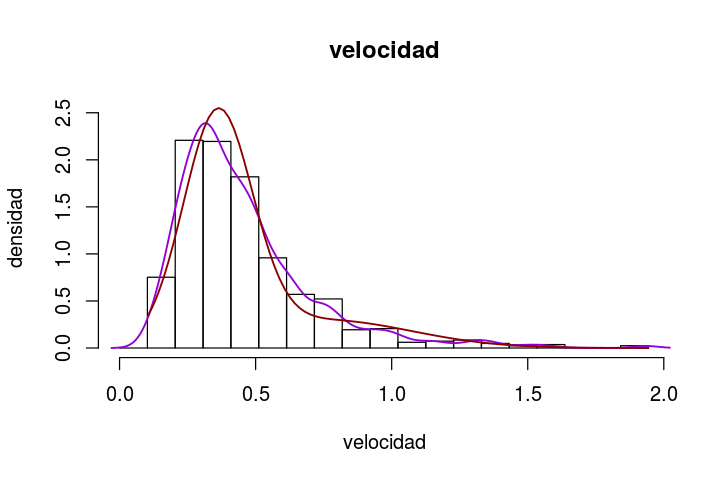

In [179]:
mixem.plot(velo.data, velo.em)

#### Ej 1.10

El modelo $\mathcal{M}_3$ tiene 8 parámetros.

#### Ej 1.11 y 1.12

In [180]:
set.seed(9)
velo.em.tres = mixtools::normalmixEM(velo.data, k=3)
sprintf('Log-like: %f', velo.em.tres$loglik)

number of iterations= 316 


[1] "Log-like: 152.400708"

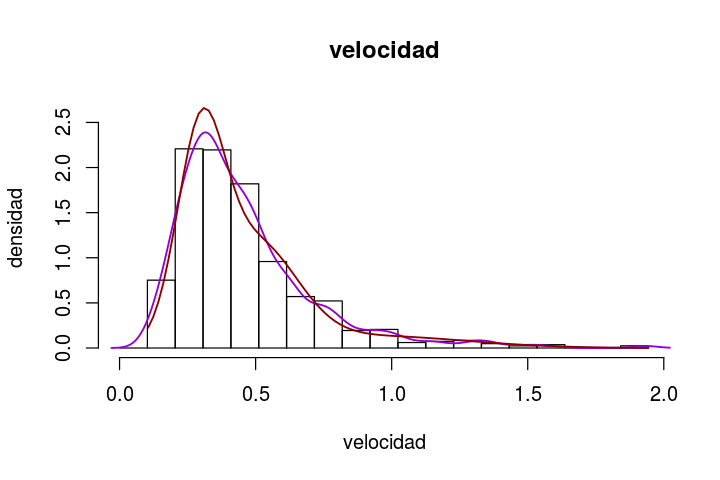

In [181]:
mixem.plot(velo.data, velo.em.tres)

#### Ej 1.13

El modelo $\mathcal{M}_3$ tiene 11 parámetros.

#### Ej 1.14 y 1.15

In [182]:
set.seed(9)
velo.em.cuatro = mixtools::normalmixEM(velo.data, k=4)
sprintf('Log-like: %f', velo.em.cuatro$loglik)

number of iterations= 781 


[1] "Log-like: 159.267018"

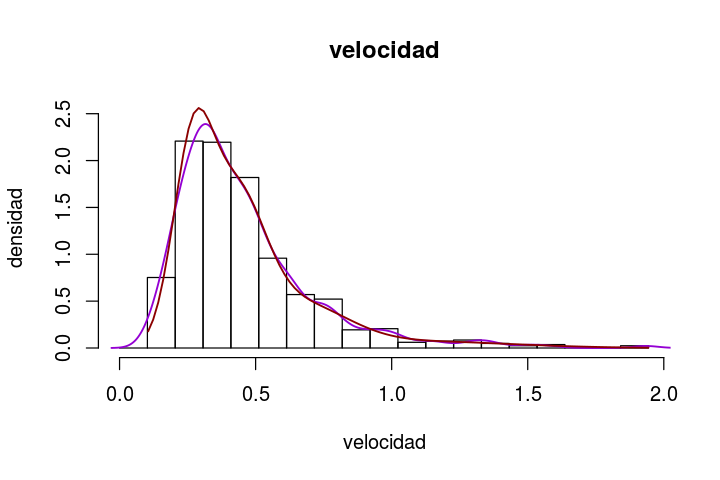

In [183]:
mixem.plot(velo.data, velo.em.cuatro)